In [11]:
from __future__ import division
import matplotlib
from pylab import *
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress
from scipy.signal import argrelextrema
import numpy as np
import pandas as pd
import random
import math

from lmfit import minimize, Parameters, Parameter, report_fit
from scipy.integrate import odeint

import scipy
import scipy.io as sio

In [12]:
kan_ = np.array([65,66,82])
all_ = np.array([80,64,70])

In [13]:
N = 10000; 
ratio = np.zeros(N); 
for i in range(N):
    a = np.random.choice(kan_, 3)
    b = np.random.choice(all_, 3)
    ratio[i] = np.mean(a)/np.mean(b)*100;
print(np.mean(ratio))
print(np.std(ratio))

99.79914109811696
8.237860256167249


In [14]:
np.mean(kan_)/np.mean(all_)

0.9953271028037384

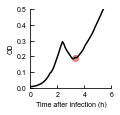

In [15]:
fontSize=7
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Arial','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
matplotlib.rcParams.update({"figure.figsize": (1.45,1.45)})
ax = plt.subplot(1,1,1)

df=pd.read_csv('../data/TECAN_230708.csv',delimiter=',',index_col=0)  

xdata = df.to_numpy()[0]/60;

ydata1 = df.loc['C7'].to_numpy()
ydata2 = df.loc['C8'].to_numpy()
ydata3 = df.loc['F7'].to_numpy()
ydata4 = df.loc['F8'].to_numpy()

ymean = (ydata3+ydata4)/2; 

    
for j in ['D3']:
    x_=(xdata[6:] - xdata[6])/60;
    y_=df.loc[j].to_numpy()[6:] -ymean[6:];
    
    plt.plot(x_,y_,color='k')
    plt.scatter(x_[32], y_[32],color='tab:red',alpha=0.5)    
plt.xlabel('Time after infection (h)')
plt.ylabel('OD')
plt.xlim(0,6)
plt.ylim(0,0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
plt.savefig('../output/Sfig13a.pdf', format='pdf', bbox_inches='tight')

In [19]:
import xlsxwriter

# Create a workbook and add a worksheet.
workbook = xlsxwriter.Workbook("../output/Sfig13a.xlsx")
writer = pd.ExcelWriter("../output/Sfig13a.xlsx", engine = 'xlsxwriter')

df=pd.read_csv('../data/TECAN_230708.csv',delimiter=',',index_col=0)  

xdata = df.to_numpy()[0]/60;
ydata1 = df.loc['C7'].to_numpy()
ydata2 = df.loc['C8'].to_numpy()
ydata3 = df.loc['F7'].to_numpy()
ydata4 = df.loc['F8'].to_numpy()

ymean = (ydata3+ydata4)/2; 

j = 'D3';
x_=(xdata[6:] - xdata[6])/60;
y_=df.loc[j].to_numpy()[6:] -ymean[6:];

data_tmptmp = pd.DataFrame();
data_tmptmp['Time (h)'] = x_;
data_tmptmp['OD'] = y_; 
data_tmptmp = data_tmptmp.T
data_tmptmp.to_excel(writer, sheet_name = 'Sfig13a')   

writer.close()

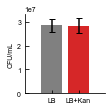

In [24]:
kan_ = np.array([65,66,82])*4e4*10; 
all_ = np.array([80,64,70])*4e4*10; 

fontSize=7
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Arial','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
matplotlib.rcParams.update({"figure.figsize": (1.45,1.45)})
ax = plt.subplot(1,1,1)

#plt.bar(np.arange(1,3,1), np.array([np.mean(all_), np.mean(kan_)]))
plt.bar(np.arange(1,3,1), \
             np.array([np.mean(all_), np.mean(kan_)]), \
             yerr=np.array([np.std(all_), np.std(kan_)]),\
        capsize=3,
       color=['gray','tab:red']) 
plt.xticks([1,2],['LB','LB+Kan'])
plt.xlim((0,3))
plt.ylabel('CFU/mL')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
plt.savefig('../output/Sfig13b.pdf', format='pdf', bbox_inches='tight')

In [26]:
import xlsxwriter

# Create a workbook and add a worksheet.
workbook = xlsxwriter.Workbook("../output/Sfig13b.xlsx")
writer = pd.ExcelWriter("../output/Sfig13b.xlsx", engine = 'xlsxwriter')

data_tmptmp = pd.DataFrame();
data_tmptmp['LB'] = [np.mean(all_), np.std(all_)];
data_tmptmp['LB+Kan'] = [np.mean(kan_), np.std(kan_)];
data_tmptmp = data_tmptmp.T
data_tmptmp.to_excel(writer, sheet_name = 'Sfig13b')   

writer.close()